In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

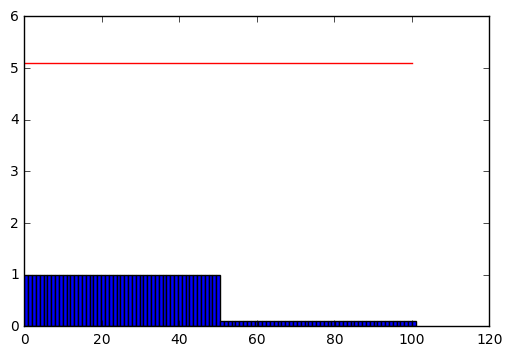

In [50]:
#parameter settings
rho_2 = 0.9
rho_1 = 1.0
g=9.8
#space discretization
n=100
L = 100.0
#buffer layer initial height 
eps = 0.1
#cells
X = np.linspace(0,L,n+2)
#initializations for momentum and height in the three layers
M_1 = np.zeros(n+2)
M_2 = np.zeros(n+2)
M_m = np.zeros(n+2)
H_1 = np.ones(n+2)
#thin layer of water to approximate dry state
H_1[1+n/2:] = eps*np.ones(1+n/2)
H_m = np.ones(n+2)*eps
#A flat surface is assumed at the beginning
H_2 = 5*np.ones(n+2) - H_1
#bathymetry
B = np.zeros(n+2)
dx = L/(n+1)

#initial visualization
plt.bar(X,H_1+B,width=dx,color='b')
#plt.plot(X,H_1+B+H_m,color='k')
plt.plot(X,H_2+H_m+H_1+B,color='r')


In [32]:
#the following function takes one forward step in time using the Euler forward difference method
def F_F(H_1,H_2,H_m,M_1,M_2,M_m,n):
    H_1_new = np.zeros(n)
    H_2_new = np.zeros(n)
    H_m_new = np.zeros(n)
    M_1_new = np.zeros(n)
    M_2_new = np.zeros(n)
    M_m_new = np.zeros(n)
    for i in range(n):
        H_1_new[i] = H_1[i+1] - dt*(M_1[i+2]-M_1[i+1])/dx
        H_2_new[i] = H_2[i+1] - dt*(M_2[i+2]-M_2[i+1])/dx
        M_1_new[i] = M_1[i+1] - dt*(r*g*H_1[i+1]*(H_2[i+2]-H_2[i+1]) - g*H_1[i+1]*(B[i+2]-B[i+1]) - g*0.5*(1+r)*H_1[i+1]*(H_m[i+2]-H_m[i+1]))/dx
        M_1_new[i] -= dt*(f1(H_1[i+2],M_1[i+2])-f1(H_1[i+1],M_1[i+1])+g*H_1[i+1]*(H_1[i+2]-H_1[i+1]))/dx
        M_2_new[i] = M_2[i+1] - dt*(g*H_2[i+1]*(H_1[i+2]+H_m[i+2]-H_m[i+1]-H_1[i+1])/dx + g*H_2[i+1]*(B[i+2]-B[i+1])/dx)
        M_2_new[i] -= dt*(f1(H_2[i+2],M_2[i+2])-f1(H_2[i+1],M_2[i+1])+g*H_2[i+1]*(H_2[i+2]-H_2[i+1]))/dx
        
        M_m_new[i] = M_m[i+1] - dt*H_m[i+1]*g*((B[i+2]-B[i+1])-r*2*(H_2[i+2]-H_2[i+1])/(1+r)-(H_1[i+2]-H_1[i+1]))/dx
        M_m_new[i] -= dt*(f1(H_m[i+2],M_m[i+2])-f1(H_m[i+1],M_m[i+1])+g*H_m[i+1]*(H_m[i+2]-H_m[i+1]))/dx
        H_m_new[i] = H_m[i+1] - dt*(M_m[i+2]-M_m[i+1])/dx
       
        #if H_1_new[i]<0:
            #H_m_new[i] += H_1_new[i]
            #H_1_new[i] =0
    #assuming boundary continuity       
    H_1[1:-1] = H_1_new
    H_1[0] = 2*H_1[1]-H_1[2]
    H_1[-1] = 2*H_1[-2]-H_1[-3]
    H_2[1:-1] = H_2_new
    H_2[0] = 2*H_2[1] - H_2[2]
    H_2[-1] = 2*H_2[-2] - H_2[-3]
    M_1[1:-1] = M_1_new
    M_1[0] = 2*M_1[1]-M_1[2]
    M_1[-1] = 2*M_1[-2]-M_1[-3]
    M_2[1:-1] = M_2_new
    M_2[0] = 2*M_2[1]-M_2[2]
    M_2[-1] = 2*M_2[-2]-M_2[-3]
    H_m[1:-1] = H_m_new
    H_m[0] = 2*H_m[1]-H_m[2]
    H_m[-1] = 2*H_m[-2]-H_m[-3]
    M_m[1:-1] = M_m_new
    M_m[0] = 2*M_m[1]-M_m[2]
    M_m[-1] = 2*M_m[-2]-M_m[-3]
    return H_1,H_2,H_m,M_1,M_2,M_m

In [33]:
#the following function takes one forward step in time using the Euler centered difference method
def F_C2(H_1,H_2,H_m,M_1,M_2,M_m,n):
   
    H_1_new = np.zeros(n)
    H_2_new = np.zeros(n)
    H_m_new = np.zeros(n)
    M_1_new = np.zeros(n)
    M_2_new = np.zeros(n)
    M_m_new = np.zeros(n)
    for i in range(n):
        
        H_1_new[i] = H_1[i+1] - dt*(M_1[i+2]-M_1[i])*0.5/dx
        H_2_new[i] = H_2[i+1] - dt*(M_2[i+2]-M_2[i])*0.5/dx
        M_1_new[i] = M_1[i+1] - dt*(r*g*H_1[i+1]*(H_2[i+2]-H_2[i]) - g*H_1[i+1]*(B[i+2]-B[i]) - g*0.5*(1+r)*H_1[i+1]*(H_m[i+2]-H_m[i]))*0.5/dx
        M_1_new[i] -= dt*(f1(H_1[i+2],M_1[i+2])-f1(H_1[i],M_1[i])+g*H_1[i+1]*(H_1[i+2]-H_1[i]))*0.5/dx
        M_2_new[i] = M_2[i+1] - dt*(g*H_2[i+1]*(H_1[i+2]+H_m[i+2]-H_m[i]-H_1[i])*0.5/dx + g*H_2[i+1]*(B[i+2]-B[i])*0.5/dx)
        M_2_new[i] -= dt*(f1(H_2[i+2],M_2[i+2])-f1(H_2[i],M_2[i])+g*H_2[i+1]*(H_2[i+2]-H_2[i]))*0.5/dx
        H_m_new[i] = H_m[i+1] - dt*(M_m[i+2]-M_m[i])*0.5/dx
        M_m_new[i] = M_m[i+1] - dt*H_m[i+1]*g*((B[i+2]-B[i])-r*2*(H_2[i+2]-H_2[i])/(1+r)-(H_1[i+2]-H_1[i]))*0.5/dx
        M_m_new[i] -= dt*(f1(H_m[i+2],M_m[i+2])-f1(H_m[i],M_m[i])+g*H_m[i+1]*(H_m[i+2]-H_m[i]))*0.5/dx
        #if H_1_new[i]<0:
            #H_m_new[i] += H_1_new[i]
            #H_1_new[i] =0
            
    H_1[1:-1] = H_1_new
    H_1[0] = 2*H_1[1]-H_1[2]
    H_1[-1] = 2*H_1[-2]-H_1[-3]
    H_2[1:-1] = H_2_new
    H_2[0] = 2*H_2[1] - H_2[2]
    H_2[-1] = 2*H_2[-2] - H_2[-3]
    M_1[1:-1] = M_1_new
    M_1[0] = 2*M_1[1]-M_1[2]
    M_1[-1] = 2*M_1[-2]-M_1[-3]
    M_2[1:-1] = M_2_new
    M_2[0] = 2*M_2[1]-M_2[2]
    M_2[-1] = 2*M_2[-2]-M_2[-3]
    H_m[1:-1] = H_m_new
    H_m[0] = 2*H_m[1]-H_m[2]
    H_m[-1] = 2*H_m[-2]-H_m[-3]
    M_m[1:-1] = M_m_new
    M_m[0] = 2*M_m[1]-M_m[2]
    M_m[-1] = 2*M_m[-2]-M_m[-3]
    return H_1,H_2,H_m,M_1,M_2,M_m

In [34]:
#the following function takes one forward step in time using the Euler backward difference method
def F_B(H_1,H_2,H_m,M_1,M_2,M_m,n):
  
    H_1_new = np.zeros(n)
    H_2_new = np.zeros(n)
    H_m_new = np.zeros(n)
    M_1_new = np.zeros(n)
    M_2_new = np.zeros(n)
    M_m_new = np.zeros(n)
    for i in range(n):
        
        H_1_new[i] = H_1[i+1] - dt*(M_1[i+1]-M_1[i])/dx
        H_2_new[i] = H_2[i+1] - dt*(M_2[i+1]-M_2[i])/dx
        H_m_new[i] = H_m[i+1] - dt*(M_m[i+1]-M_m[i])*0.5/dx
   
        M_1_new[i] = M_1[i+1] - dt*(r*g*H_1[i+1]*(H_2[i+1]-H_2[i]) - g*H_1[i+1]*(B[i+1]-B[i]) -
                                    g*0.5*(1+r)*H_1[i+1]*(H_m[i+1]-H_m[i]))/dx
        M_1_new[i] -= dt*(f1(H_1[i+1],M_1[i+1])-f1(H_1[i],M_1[i])+g*H_1[i+1]*(H_1[i+1]-H_1[i]))/dx
        M_2_new[i] = M_2[i+1] - dt*(g*H_2[i+1]*(H_1[i+1]+H_m[i+1]-H_m[i]-H_1[i])/dx + 
                                    g*H_2[i+1]*(B[i+1]-B[i])/dx)
        M_2_new[i] -= dt*(f1(H_2[i+1],M_2[i+1])-f1(H_2[i],M_2[i])+g*H_2[i+1]*(H_2[i+1]-H_2[i]))/dx
        
        M_m_new[i] = M_m[i+1] - dt*H_m[i+1]*g*((B[i+1]-B[i])-r*2*(H_2[i+1]-H_2[i])/(1+r)-(H_1[i+1]-H_1[i]))/dx
        M_m_new[i] -= dt*(f1(H_m[i+1],M_m[i+1])-f1(H_m[i],M_m[i])+g*H_m[i+1]*(H_m[i+1]-H_m[i]))/dx
        #if H_1_new[i]<0:
            #H_m_new[i] += H_1_new[i]
            #H_1_new[i] =0
    H_1[1:-1] = H_1_new
    H_1[0] = 2*H_1[1]-H_1[2]
    H_1[-1] = 2*H_1[-2]-H_1[-3]
    H_2[1:-1] = H_2_new
    H_2[0] = 2*H_2[1] - H_2[2]
    H_2[-1] = 2*H_2[-2] - H_2[-3]
    H_m[1:-1] = H_m_new
    H_m[0] = 2*H_m[1]-H_m[2]
    H_m[-1] = 2*H_m[-2]-H_m[-3]
    M_1[1:-1] = M_1_new
    M_1[0] = 2*M_1[1]-M_1[2]
    M_1[-1] = 2*M_1[-2]-M_1[-3]
    M_2[1:-1] = M_2_new
    M_2[0] = 2*M_2[1]-M_2[2]
    M_2[-1] = 2*M_2[-2]-M_2[-3]
   
    M_m[1:-1] = M_m_new
    M_m[0] = 2*M_m[1]-M_m[2]
    M_m[-1] = 2*M_m[-2]-M_m[-3]
    return H_1,H_2,H_m,M_1,M_2,M_m

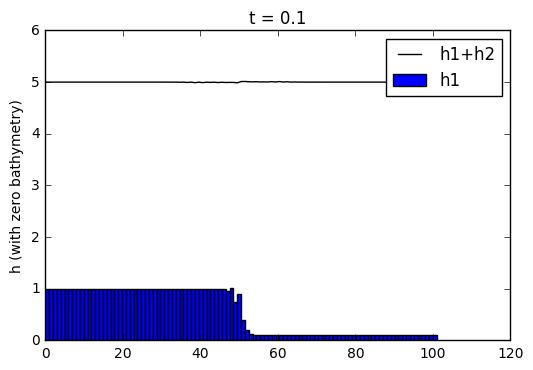

In [69]:
#Test cell
#pick dt small enough for the CFL condition
dt = 0.0001
#parameters
g = 9.8
r = rho_2/rho_1
#xx = X[1:-1]
#function used in calculation
def f1(h,m):
    if h==0:
        return 0.0
    else:
        return m**2/h
#uses three steps in each iteration where each method is employed once
#this procedure improves solution behavior
for t in range(500):
    H_1,H_2,H_m,M_1,M_2,M_m=F_F(H_1,H_2,H_m,M_1,M_2,M_m,n)
    H_1,H_2,H_m,M_1,M_2,M_m=F_C2(H_1,H_2,H_m,M_1,M_2,M_m,n)
    H_1,H_2,H_m,M_1,M_2,M_m=F_B(H_1,H_2,H_m,M_1,M_2,M_m,n)
    
#plot current status
plt.bar(X,H_1+B,width=dx,color='b',label='h1')
plt.plot(X,H_2+H_1+B,'k',label='h1+h2')
plt.ylabel('h (with zero bathymetry)')
plt.title('t = '+str((t+1)*2*dt))
plt.legend()

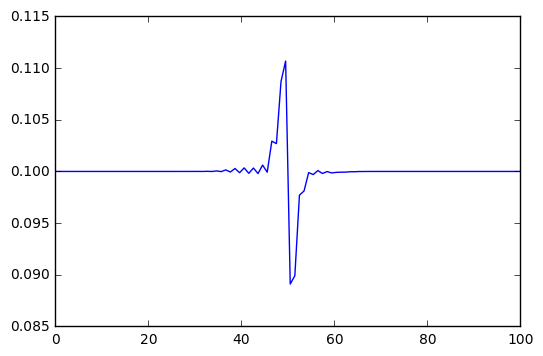

In [70]:
#buffer layer behavior
plt.plot(X,H_m)

In [71]:
#check conservation of mass in two layers
sum(H_1)

56.100000000000129

In [72]:
sum(H_2)

453.8999999999977

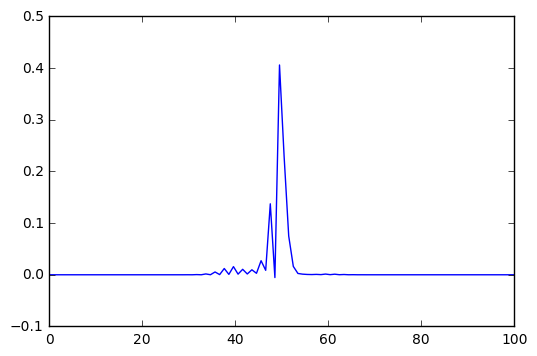

In [73]:
#bottom layer momentum
plt.plot(X,M_1)

In [ ]:
#the current problem involves negative values in the bottom layer which will be dealt with using differentiated dt in each step 
#adapting to the wave speed behavior. A half step Euler method might be used for solution evolution.